In [2]:
import math
import numpy as np

from IPython.display import Audio
from scipy.io import wavfile
import random

In [3]:
class Oscillator:
    def __init__(self, freq, phase=0):
        self.freq = freq
        self.phase = phase
        self.cur_phase = 0
        self.phase_step = 0
    
    def set_phase_step(self, phase_step):
        self.phase_step = phase_step

    def step(self):
        self.cur_phase += self.phase_step
        if self.cur_phase >= 2 * math.pi:
            self.cur_phase -= 2 * math.pi
        return math.sin(self.cur_phase)

In [4]:
sample_rate = 12000
fsk_base_freq = 300
fsk_freq_diff = 85
fsk_symbol_duration = sample_rate//10

def fsk_modulate(data):
    wav = []
    osc = Oscillator(0)
    for _ in range(random.randint(1, fsk_symbol_duration)):
        wav.append(osc.step())
    for i in range(len(data)):
        freq = fsk_base_freq + fsk_freq_diff * data[i]
        
        osc.set_phase_step(2 * math.pi * freq / sample_rate)
        for _ in range(fsk_symbol_duration):
            wav.append(osc.step())
    for _ in range(random.randint(1, fsk_symbol_duration)):
        wav.append(osc.step())
    return np.array(wav)

In [5]:
def to_wav(symbols, wav_file):
    wav = fsk_modulate(symbols)
    # Add AWGN of 0.001 amplitude
    wav += 0.001 * np.random.randn(len(wav))
    wav = (wav * 32767 / 4).astype(np.int16)
    wavfile.write(wav_file, sample_rate, wav)

In [6]:
def str_to_symbols(s):
    symbols = []
    for c in s:
        cur_symbols = []
        num = ord(c)
        for _ in range(3):
            cur_symbols.append(num % 7)
            num //= 7
        assert(num == 0)
        symbols += cur_symbols[::-1]
    return symbols

In [7]:
to_wav(str_to_symbols('greyhats'), 'greyhats.wav')
to_wav(str_to_symbols('greycats'), 'greycats.wav')
to_wav(str_to_symbols('grayhats'), 'grayhats.wav')
to_wav(str_to_symbols('graycats'), 'graycats.wav')
to_wav(str_to_symbols('grey{why_th3_7fsk_fr3qu3ncy_sh1ft_0349jf0erjf9jdsgdfg}'), 'flag.wav')

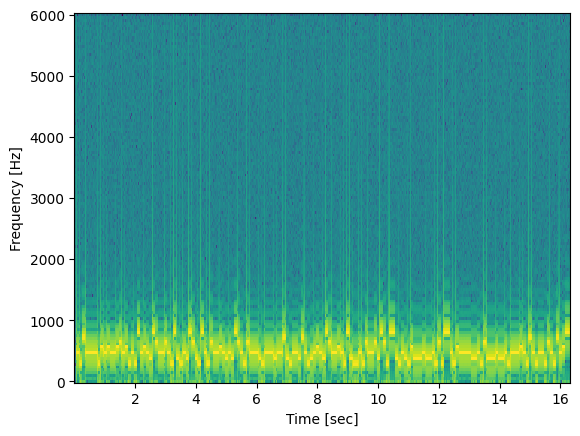

In [10]:
# Spectrogram of test.wav
import matplotlib.pyplot as plt
from scipy import signal

sample_rate, samples = wavfile.read('flag.wav')
f, t, Sxx = signal.spectrogram(samples, sample_rate)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()